In [ ]:
## PROJECT IRON MAN, EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman.parquet'
df = pd.read_parquet(file_path)

print("Dataset Shape:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())

Dataset Shape: (331700, 8)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331700 entries, 0 to 331699
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    331700 non-null  object        
 1   StockCode    331700 non-null  object        
 2   Description  331700 non-null  object        
 3   Quantity     331700 non-null  int64         
 4   InvoiceDate  331700 non-null  datetime64[ns]
 5   UnitPrice    331700 non-null  float64       
 6   CustomerID   331700 non-null  int64         
 7   Country      331700 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 20.2+ MB
None


In [2]:
print("\nNumerical Summary:")
print(df[['Quantity', 'UnitPrice']].describe())

print("\nTop 10 Most Sold Products:")
print(df['Description'].value_counts().head(10))

print("\nTop 10 Countries by Transaction Count:")
print(df['Country'].value_counts().head(10))


Numerical Summary:
            Quantity      UnitPrice
count  331700.000000  331700.000000
mean       10.776871       3.966781
std       139.789064      46.546110
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        11.000000       4.130000
max     74215.000000   13541.330000

Top 10 Most Sold Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    1635
REGENCY CAKESTAND 3 TIER              1319
JUMBO BAG RED RETROSPOT               1234
PARTY BUNTING                          979
ASSORTED COLOUR BIRD ORNAMENT          924
LUNCH BAG RED RETROSPOT                841
LUNCH BAG  BLACK SKULL.                817
HEART OF WICKER SMALL                  762
JUMBO STORAGE BAG SUKI                 747
LUNCH BAG CARS BLUE                    742
Name: count, dtype: int64

Top 10 Countries by Transaction Count:
Country
United Kingdom    304126
Germany             5632
EIRE                5234
France              4952
Netherlands 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18492\433852820.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot()


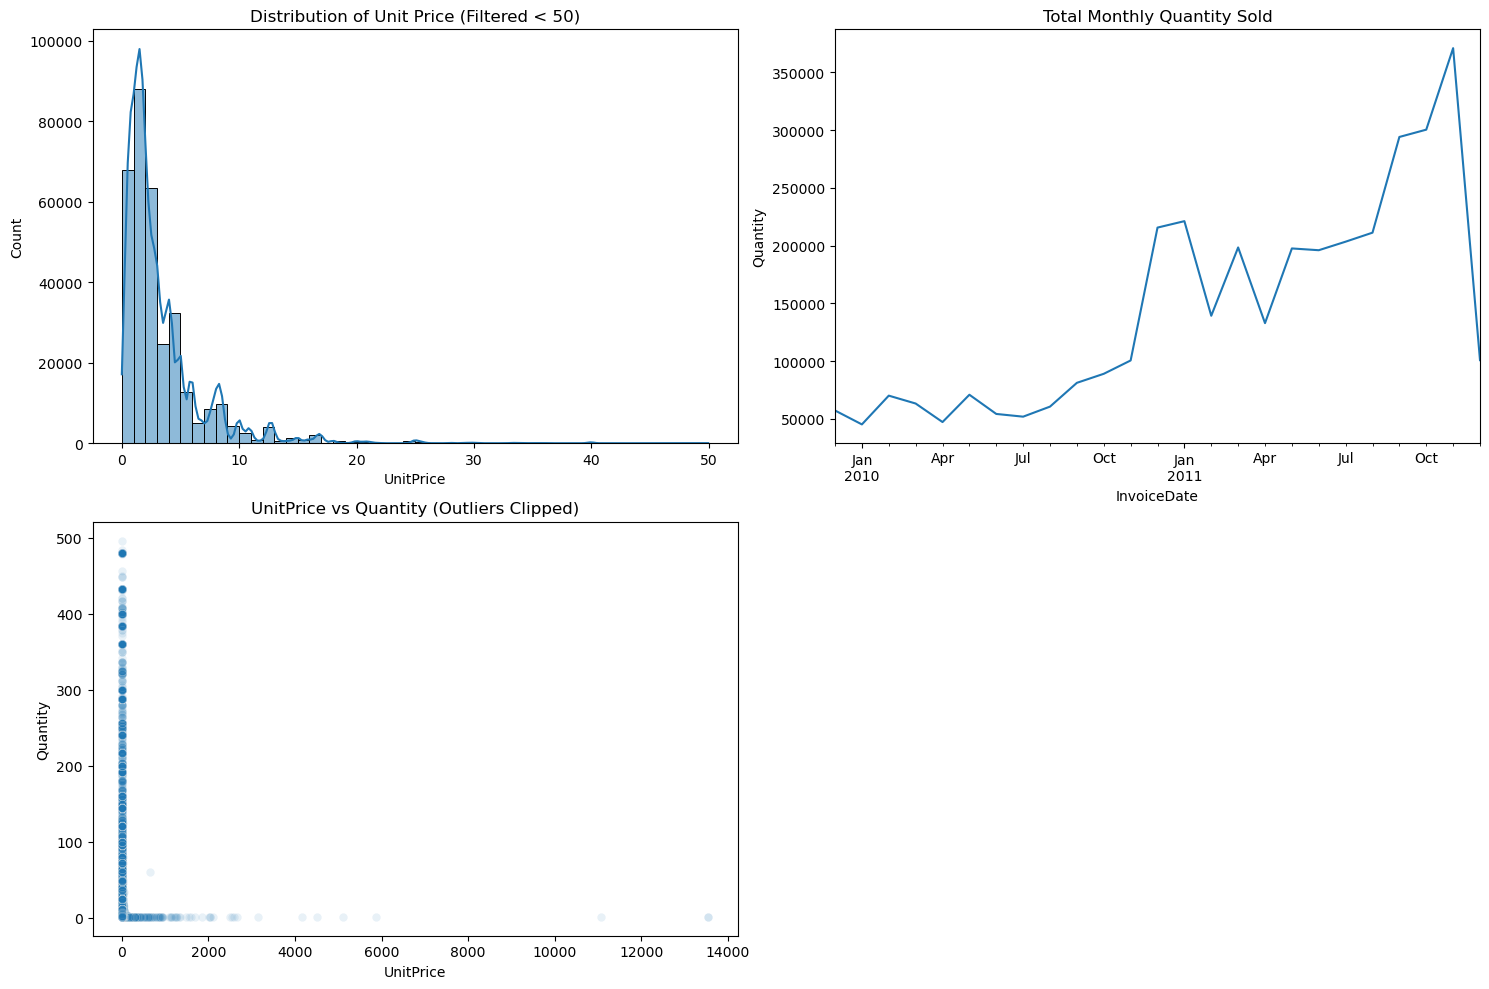

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df[df['UnitPrice'] < 50]['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price (Filtered < 50)')

plt.subplot(2, 2, 2)
df.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot()
plt.title('Total Monthly Quantity Sold')
plt.ylabel('Quantity')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df[df['Quantity'] < 500], x='UnitPrice', y='Quantity', alpha=0.1)
plt.title('UnitPrice vs Quantity (Outliers Clipped)')

plt.tight_layout()
plt.show()

Top 5 Highest Value Customers:
            MonetaryValue  Frequency  Quantity
CustomerID                                    
0              1087940.88       2178    250539
18102           196261.63         85     50406
14646           171898.02        102    123936
17450           120567.03         34     44271
14911            93094.96        326     50936


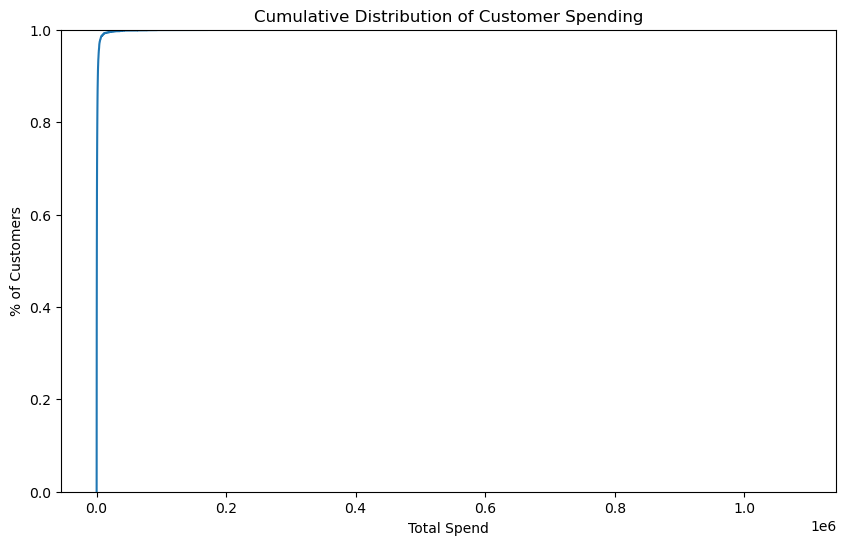

In [4]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'})

print("Top 5 Highest Value Customers:")
print(customer_data.sort_values('MonetaryValue', ascending=False).head())

plt.figure(figsize=(10, 6))
sns.ecdfplot(customer_data['MonetaryValue'])
plt.title('Cumulative Distribution of Customer Spending')
plt.xlabel('Total Spend')
plt.ylabel('% of Customers')
plt.show()

In [ ]:
## Redoing this accounting for Customer 0

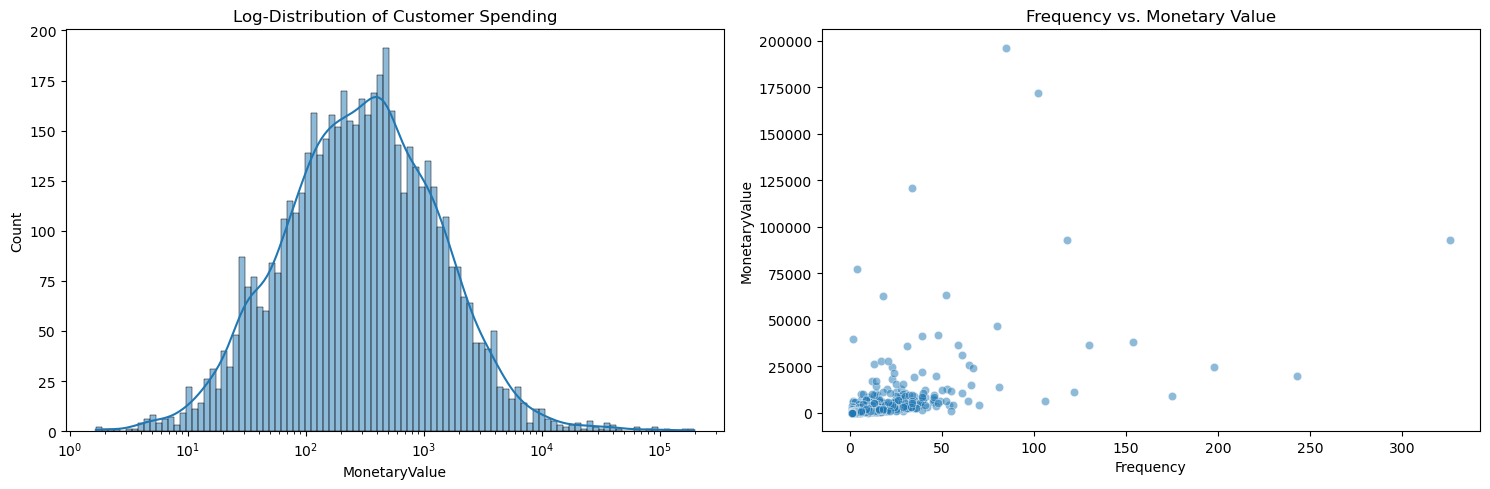

Total identified customers: 5428
Average Spend per Identified Customer: 1027.54


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

real_customers = df[df['CustomerID'] != 0].copy()

real_customer_data = real_customers.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'})

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(real_customer_data['MonetaryValue'], bins=100, kde=True, log_scale=True)
plt.title('Log-Distribution of Customer Spending')

plt.subplot(1, 2, 2)
sns.scatterplot(data=real_customer_data, x='Frequency', y='MonetaryValue', alpha=0.5)
plt.title('Frequency vs. Monetary Value')

plt.tight_layout()
plt.show()

print(f"Total identified customers: {len(real_customer_data)}")
print(f"Average Spend per Identified Customer: {real_customer_data['MonetaryValue'].mean():.2f}")

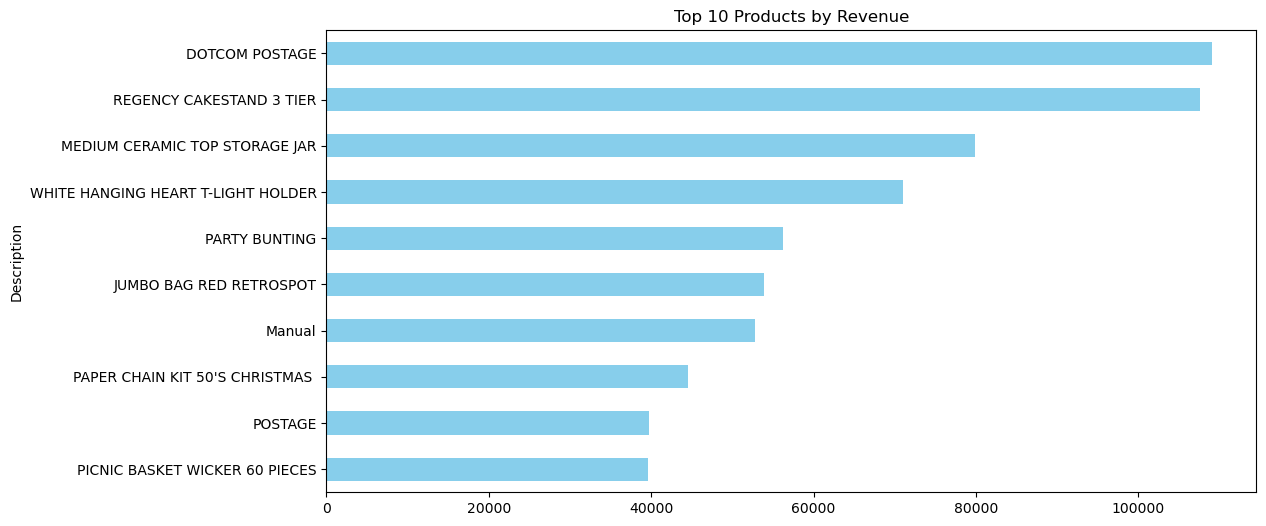

Average items per invoice: 117.15


In [5]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.show()

items_per_inv = df.groupby('InvoiceNo')['Quantity'].sum()
print(f"Average items per invoice: {items_per_inv.mean():.2f}")

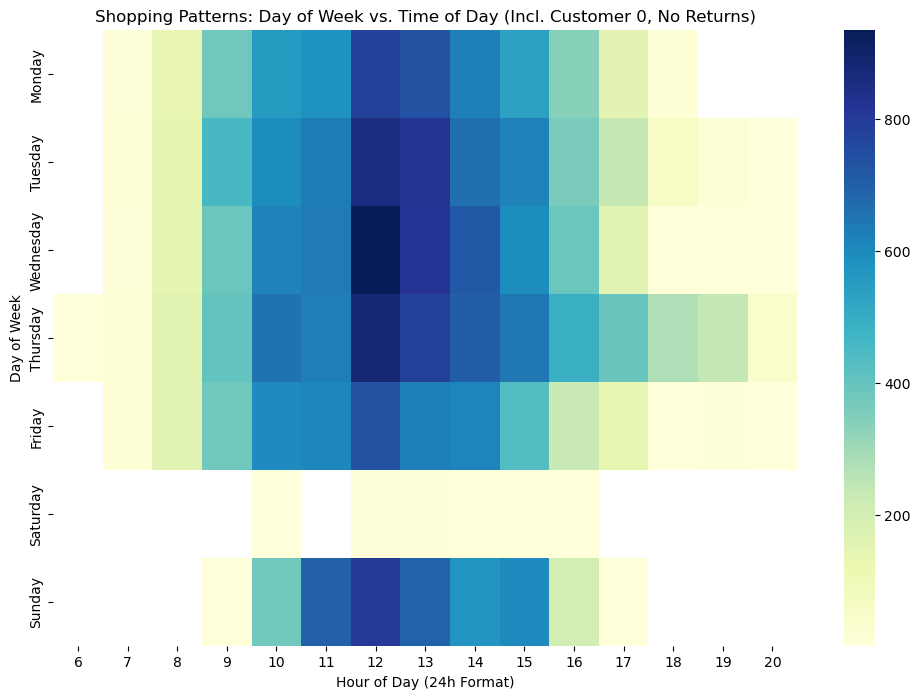

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman2.parquet'
df = pd.read_parquet(file_path)

# Filter out returns but KEEP Customer 0
df_plot = df[df['Quantity'] > 0].copy()

# Time Features
df_plot['DayOfWeek'] = df_plot['InvoiceDate'].dt.day_name()
df_plot['Hour'] = df_plot['InvoiceDate'].dt.hour

# Pivot Table
pivot_table = df_plot.pivot_table(index='DayOfWeek', 
                                  columns='Hour', 
                                  values='InvoiceNo', 
                                  aggfunc='nunique')

# Monday-Sunday flow
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title('Shopping Patterns: Day of Week vs. Time of Day (Incl. Customer 0, No Returns)')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day (24h Format)')
plt.show()

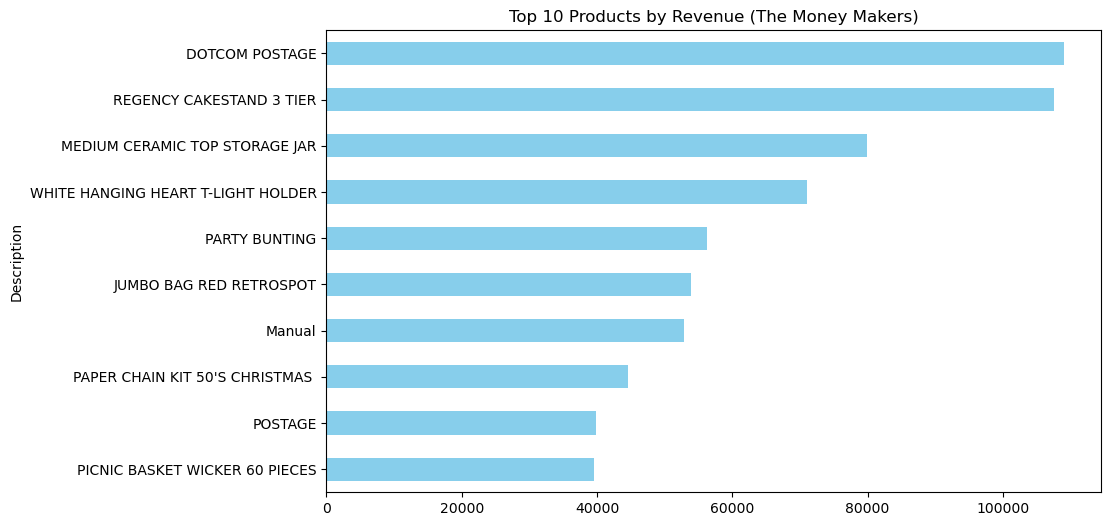

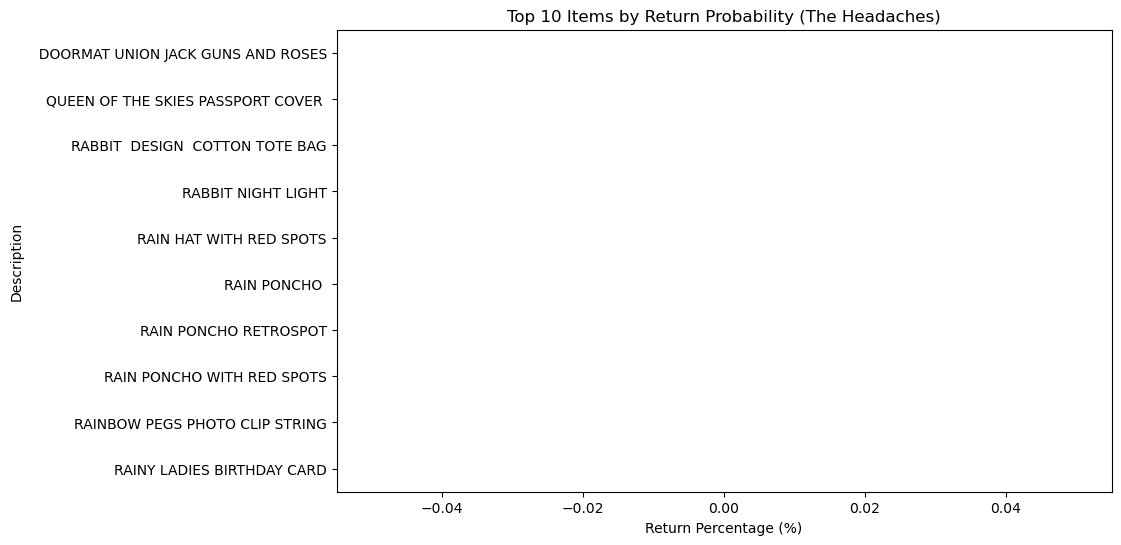

Check this out - top returners data:
                              Description  Return_Prob
0       DOORMAT UNION JACK GUNS AND ROSES          0.0
3346   QUEEN OF THE SKIES PASSPORT COVER           0.0
3348      RABBIT  DESIGN  COTTON TOTE BAG          0.0
3350                   RABBIT NIGHT LIGHT          0.0
3351              RAIN HAT WITH RED SPOTS          0.0
3352                         RAIN PONCHO           0.0
3353                RAIN PONCHO RETROSPOT          0.0
3354           RAIN PONCHO WITH RED SPOTS          0.0
3355       RAINBOW PEGS PHOTO CLIP STRING          0.0
3356           RAINY LADIES BIRTHDAY CARD          0.0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. SETUP THE DATA ---
# make sure we have the price total for each row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- 2. MOST SOLD ITEMS (BY REVENUE) ---
# this looks at positive sales only
top_money = df[df['Quantity'] > 0].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# --- 3. RETURN PROBABILITY (THE HEADACHES) ---
# first, get total units sold per thing
total_sold = df[df['Quantity'] > 0].groupby('Description')['Quantity'].sum().reset_index()

# second, get returns and fix those negative numbers
returns_only = df[df['Quantity'] < 0].copy()
returns_only['Qty_Abs'] = returns_only['Quantity'].abs()
total_returned = returns_only.groupby('Description')['Qty_Abs'].sum().reset_index()

# merge them into one table so we can do the math
# we use 'left' join to keep everything we sold
junk_finder = pd.merge(total_sold, total_returned, on='Description', how='left').fillna(0)
junk_finder.columns = ['Description', 'Sold', 'Returned']

# calculate the percentage
junk_finder['Return_Prob'] = (junk_finder['Returned'] / junk_finder['Sold']) * 100

# only look at stuff that sold at least 20 times (so the % isn't crazy)
top_junk = junk_finder[junk_finder['Sold'] > 20].sort_values('Return_Prob', ascending=False).head(10)

# Graph: The Money Makers
plt.figure(figsize=(10, 6))
top_money.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Revenue (The Money Makers)')
plt.gca().invert_yaxis()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. THE BIG CHECK: Do we even have returns?
num_returns = len(df[df['Quantity'] < 0])
print(f"Total return rows found in data: {num_returns}")

if num_returns == 0:
    print("!!! ERROR: No negative quantities found. We can't calculate returns if they aren't there!")
else:
    # 2. Fix the names (sometimes ' Handbag' vs 'Handbag' breaks the match)
    df['Description'] = df['Description'].str.strip()

    # 3. Get Sales
    sales = df[df['Quantity'] > 0].groupby('Description')['Quantity'].sum().reset_index()
    sales.columns = ['Description', 'Sold']

    # 4. Get Returns (fix negatives first)
    rets = df[df['Quantity'] < 0].copy()
    rets['Qty_Abs'] = rets['Quantity'].abs()
    returns = rets.groupby('Description')['Qty_Abs'].sum().reset_index()
    returns.columns = ['Description', 'Returned']

    # 5. Merge them
    # We use an 'inner' join here just to see things that HAVE returns
    stats = pd.merge(sales, returns, on='Description', how='inner')
    stats['Return_Prob'] = (stats['Returned'] / stats['Sold']) * 100

    # 6. Filter for stuff that actually sells
    top_junk = stats[stats['Sold'] > 10].sort_values('Return_Prob', ascending=False).head(10)

    # --- THE GRAPHS ---
    # Top Money Makers
    plt.figure(figsize=(10, 5))
    df[df['Quantity'] > 0].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
    plt.title('Top 10 Revenue Items')
    plt.gca().invert_yaxis()
    plt.show()

    # Top Headaches
    if not top_junk.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(data=top_junk, x='Return_Prob', y='Description', color='firebrick')
        plt.title('Top 10 Items by Return % (Min 10 Sold)')
        plt.show()
        
        print("\nFound these risky items:")
        print(top_junk[['Description', 'Sold', 'Returned', 'Return_Prob']])
    else:
        print("Still nothing. This means no item that was sold was also returned.")

Total return rows found in data: 0
!!! ERROR: No negative quantities found. We can't calculate returns if they aren't there!


In [11]:
import numpy as np

ml_df = df[df['CustomerID'] != 0].copy()


ml_df['AbsQuantity'] = ml_df['Quantity'].abs()
ml_df['AbsTotal'] = (ml_df['Quantity'] * ml_df['UnitPrice']).abs()


snapshot_date = ml_df['InvoiceDate'].max() + pd.Timedelta(days=1)

feature_table = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'AbsTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'AbsTotal': 'Monetary'
})


sales_total = ml_df[ml_df['Quantity'] > 0].groupby('CustomerID')['AbsTotal'].sum()
returns_total = ml_df[ml_df['Quantity'] < 0].groupby('CustomerID')['AbsTotal'].sum()

feature_table['Return_Amount'] = returns_total.reindex(feature_table.index).fillna(0)
feature_table['Return_Rate'] = (feature_table['Return_Amount'] / feature_table['Monetary']) * 100


print("Final ML Feature Table (First 5 Rows):")
print(feature_table.head())

Final ML Feature Table (First 5 Rows):
            Recency  Frequency  Monetary  Return_Amount  Return_Rate
CustomerID                                                          
12346           326          4  77243.58            0.0          0.0
12347             2          7   2055.31            0.0          0.0
12348            75          5   1317.68            0.0          0.0
12349            19          3   1100.95            0.0          0.0
12350           310          1    178.00            0.0          0.0


In [2]:
import pandas as pd
import os

# 1. Load the updated cleaned file
file_path = r'C:\Users\ASUS\Desktop\courses\projects\iron-man\data\clean\ironman2.parquet'
df = pd.read_parquet(file_path)

# 2. Filter for identified customers and calculate LineTotal
ml_df = df[df['CustomerID'] != 0].copy()
ml_df['LineTotal'] = ml_df['Quantity'] * ml_df['UnitPrice']

# 3. Establish a snapshot date for Recency
snapshot_date = ml_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 4. Aggregate to Customer Level (Recency, Frequency, Net Monetary)
customer_features = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'LineTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'LineTotal': 'Monetary_Net'
})

# 5. FIX: Calculate Return-Specific Metrics safely
# First, create a temporary column of absolute values for the whole dataframe
ml_df['AbsLineTotal'] = ml_df['LineTotal'].abs()

# Now sum up only the rows that were originally negative (returns)
total_return_val = ml_df[ml_df['Quantity'] < 0].groupby('CustomerID')['AbsLineTotal'].sum()
# Sum up only the rows that were positive (sales)
total_sales_val = ml_df[ml_df['Quantity'] > 0].groupby('CustomerID')['AbsLineTotal'].sum()

# 6. Add to our table and calculate Return Rate
customer_features['Return_Amount'] = total_return_val.reindex(customer_features.index).fillna(0)
customer_features['Return_Rate'] = (customer_features['Return_Amount'] / total_sales_val.reindex(customer_features.index)) * 100
customer_features['Return_Rate'] = customer_features['Return_Rate'].fillna(0)

print("Feature Table Created Successfully!")
print(customer_features.head())

Feature Table Created Successfully!
            Recency  Frequency  Monetary_Net  Return_Amount  Return_Rate
CustomerID                                                              
12346           326          4      77243.58            0.0          0.0
12347             2          7       2055.31            0.0          0.0
12348            75          5       1317.68            0.0          0.0
12349            19          3       1100.95            0.0          0.0
12350           310          1        178.00            0.0          0.0


In [4]:
# 1. Create the base RFM features
ml_feature_table = ml_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'LineTotal': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'LineTotal': 'Monetary_Net'
})

# 2. Add the Return metrics (now in the SAME table)
ml_feature_table['Return_Amount'] = total_return_val.reindex(ml_feature_table.index).fillna(0)
ml_feature_table['Return_Rate'] = (ml_feature_table['Return_Amount'] / total_sales_val.reindex(ml_feature_table.index)) * 100
ml_feature_table['Return_Rate'] = ml_feature_table['Return_Rate'].fillna(0)

# 3. Final Check: Everything should be in ml_feature_table now
print("Columns in your single ML Table:", ml_feature_table.columns.tolist())
print(ml_feature_table.head())

Columns in your single ML Table: ['Recency', 'Frequency', 'Monetary_Net', 'Return_Amount', 'Return_Rate']
            Recency  Frequency  Monetary_Net  Return_Amount  Return_Rate
CustomerID                                                              
12346           326          4      77243.58            0.0          0.0
12347             2          7       2055.31            0.0          0.0
12348            75          5       1317.68            0.0          0.0
12349            19          3       1100.95            0.0          0.0
12350           310          1        178.00            0.0          0.0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Scaling: ML models struggle if one number is 1,000 and another is 0.1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ml_feature_table)

# 2. Clustering: Find 4 "Loyalty Buckets"
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ml_feature_table['Cluster'] = kmeans.fit_predict(scaled_features)

# 3. Identify the characteristics of each bucket
bucket_analysis = ml_feature_table.groupby('Cluster').mean()
print(bucket_analysis)

            Recency   Frequency   Monetary_Net  Return_Amount  Return_Rate
Cluster                                                                   
0         69.488694    5.764556     947.911244            0.0          0.0
1        461.535281    1.915105     172.766632            0.0          0.0
2         25.225352   53.549296   17403.999310            0.0          0.0
3          4.400000  133.000000  134936.916000            0.0          0.0
